In [2]:
from networks import *
from simulation import *
import matplotlib.pyplot as plt
import numpy as np

In [3]:
erNet = ErNetwork.load_json('my_networks/er1.json')
baNet = BaNetwork.load_json('my_networks/ba1.json')
wsNet = WsNetwork.load_json('my_networks/ws1.json')

lbl = 'Distribuzioni gradi rete '
nets = [(erNet, 'Erdős–Rényi'), (baNet, 'Barabási–Albert'), (wsNet, 'Watts–Strogatz')]

Network caricato da my_networks/er1.json
Network caricato da my_networks/ba1.json
Network caricato da my_networks/ws1.json


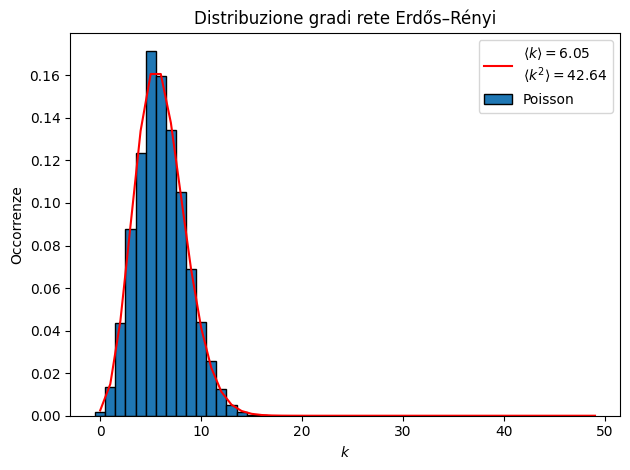

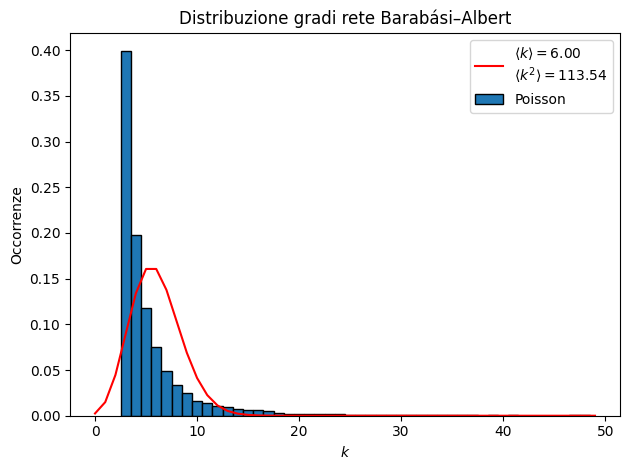

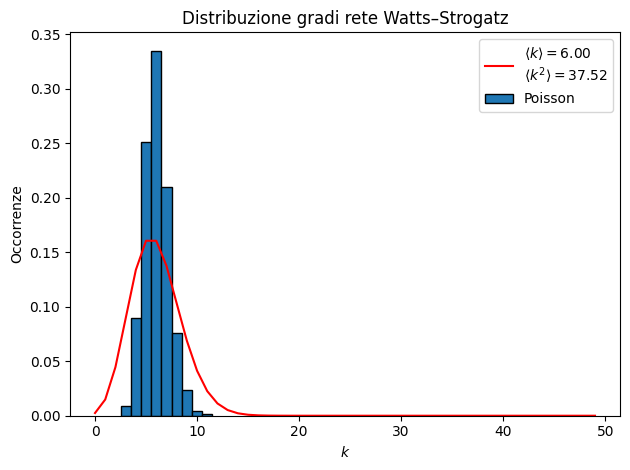

In [4]:
i = 0
import scipy.stats as stats

for net, name in nets:
    dist = net.k_distribution()  # Assuming net.k_distribution() gives the degree distribution
    plt.hist(dist, bins=range(min(dist), min(50, max(dist) + 2)), edgecolor='black', align='left', density=True)

    # Overlay the Poisson distribution for comparison
    avg_k = 6  # Average degree for the Poisson distribution
    k_values = np.arange(0, 50)  # Range of k values for the Poisson distribution
    poisson_dist = stats.poisson.pmf(k_values, avg_k)  # Poisson distribution for avg_k = 6
    plt.plot(k_values, poisson_dist, 'r-', label=f'Poisson Distribution\n$⟨k⟩ = {avg_k}$')

    # Labels and title
    plt.xlabel(f'$k$')
    plt.ylabel("Occorrenze")
    plt.title(f'Distribuzione gradi rete {name}')
    plt.legend([f"$⟨k⟩ = {np.mean(dist):.2f}$\n$⟨k^2⟩ = {np.mean(dist**2):.2f}$", 'Poisson'], loc="upper right")

    # Display and save the plot
    plt.tight_layout()
    plt.savefig(f'imgs/gradi/grado_rete_{i}.png')
    i += 1
    plt.show()

Stima di γ: 2.47


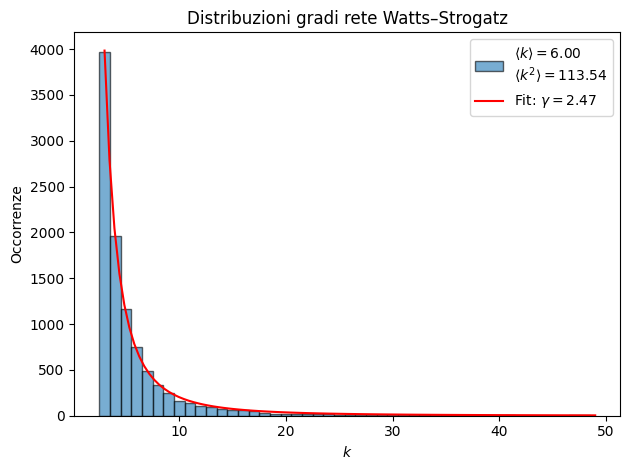

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Funzione di potenza per il fit
def power_law(k, gamma, A):
    return A * k**(-gamma)

# Otteniamo la distribuzione dei gradi dalla rete BA
dist = np.array(baNet.k_distribution())

# Costruiamo l'istogramma dei gradi
degree_counts = np.bincount(dist)
k_values = np.arange(len(degree_counts))

# Filtriamo i valori non nulli e consideriamo solo i primi 50 gradi
valid_indices = (degree_counts > 0) & (k_values < 50)
k_values = k_values[valid_indices]
degree_counts = degree_counts[valid_indices]

# Fit della distribuzione alla legge di potenza
popt, _ = curve_fit(power_law, k_values, degree_counts, p0=[2.5, 1e3])

# Parametro gamma stimato
gamma_fit, A_fit = popt
print(f"Stima di γ: {gamma_fit:.2f}")

# Creazione dell'istogramma con lo stile richiesto
plt.hist(dist, bins=range(min(dist), min(50, max(dist) + 2)), edgecolor='black', align='left', alpha=0.6, label="Dati")

# Sovrapponiamo il fit come curva rossa
k_fit = np.linspace(min(k_values), max(k_values), 100)
plt.plot(k_fit, power_law(k_fit, *popt), label=f"Fit: $\\gamma={gamma_fit:.2f}$", color="red")

# Etichette e titolo
plt.xlabel(r'$k$')
plt.ylabel("Occorrenze")
plt.title(lbl + name)

# Aggiunta della legenda con ⟨k⟩ e ⟨k²⟩
plt.legend([
    f"$⟨k⟩ = {np.mean(dist):.2f}$\n$⟨k^2⟩ = {np.mean(dist**2):.2f}$",
    f"Fit: $\\gamma={gamma_fit:.2f}$"
], loc="upper right")

# Layout pulito e salvataggio dell'immagine
plt.tight_layout()
plt.savefig(f'imgs/gradi/grado_rete_1.png')
i += 1
plt.show()
